In [422]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(palette="Set2")

from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, )
from mlxtend.plotting import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler


from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import SMOTE

In [423]:
df1=pd.read_csv('Churn_Modelling.csv')

In [424]:
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [425]:
df=df1.copy()

In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [427]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [428]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


 This DataFrame has 10000 rows and 14 attributes 

In [429]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Looking for missing data 

In [430]:
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

RowNumber
False    10000
Name: RowNumber, dtype: int64

CustomerId
False    10000
Name: CustomerId, dtype: int64

Surname
False    10000
Name: Surname, dtype: int64

CreditScore
False    10000
Name: CreditScore, dtype: int64

Geography
False    10000
Name: Geography, dtype: int64

Gender
False    10000
Name: Gender, dtype: int64

Age
False    10000
Name: Age, dtype: int64

Tenure
False    10000
Name: Tenure, dtype: int64

Balance
False    10000
Name: Balance, dtype: int64

NumOfProducts
False    10000
Name: NumOfProducts, dtype: int64

HasCrCard
False    10000
Name: HasCrCard, dtype: int64

IsActiveMember
False    10000
Name: IsActiveMember, dtype: int64

EstimatedSalary
False    10000
Name: EstimatedSalary, dtype: int64

Exited
False    10000
Name: Exited, dtype: int64



### Looking for geography and gender distribution against estimated salary 

Text(38.54343723958334, 0.5, 'Estimated Salary')

<Figure size 1440x1440 with 0 Axes>

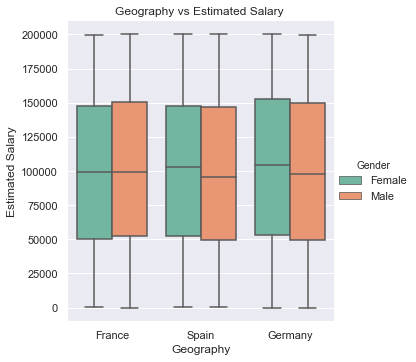

In [431]:
plt.figure(figsize=(20,20))
sns.catplot(x="Geography", y="EstimatedSalary", hue='Gender', kind='box', data=df)

plt.title("Geography vs Estimated Salary ")
plt.xlabel("Geography")
plt.ylabel("Estimated Salary")

### Looking for the relationship between Age and credit score

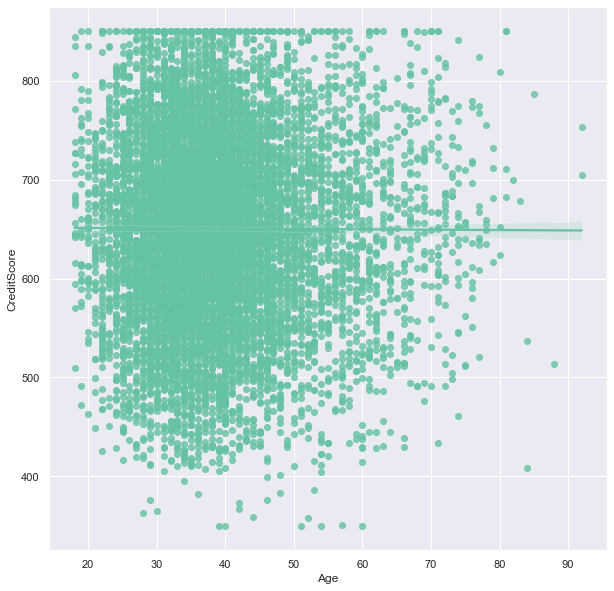

In [432]:
plt.figure(figsize=(10,10))
sns.regplot(x="Age", y="CreditScore", data=df)

In [433]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

### EDA

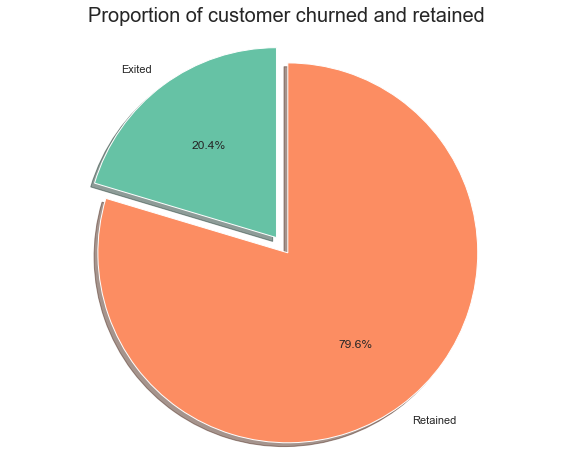

In [434]:
labels= 'Exited', 'Retained'
sizes=[df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]

explode=(0, 0.1)
fig1, ax1= plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size=20)
plt.show()

### Status relation with categorical variables 

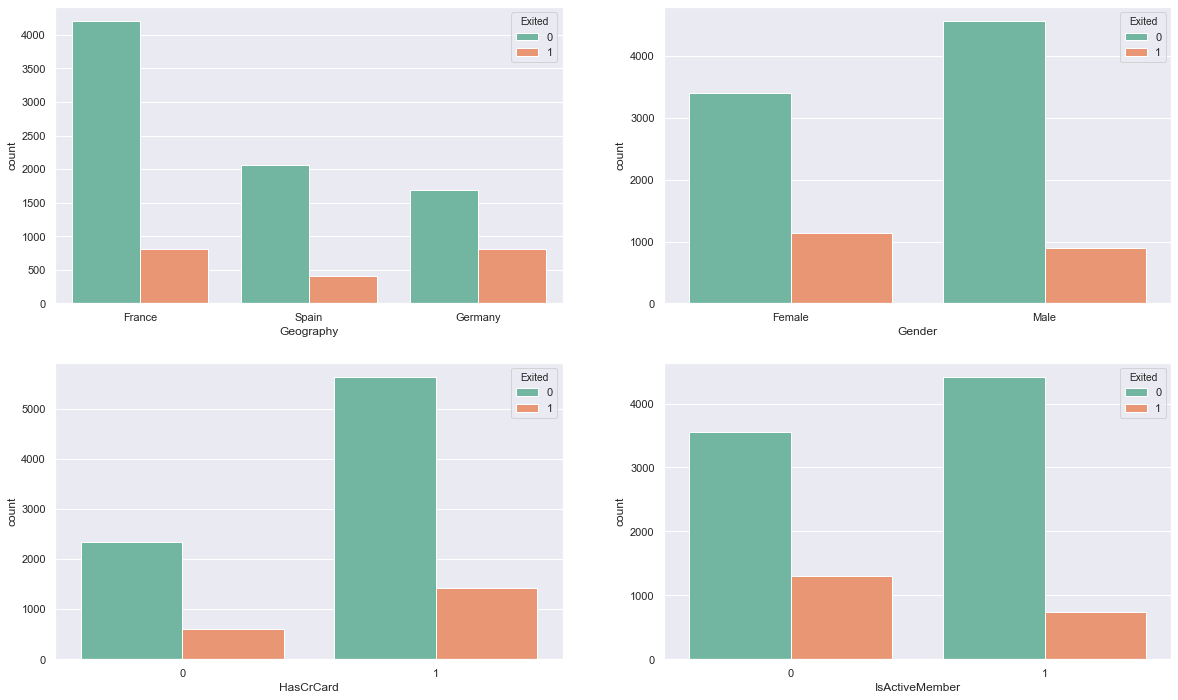

In [435]:
fig , axarr = plt.subplots(2,2, figsize=(20,12))

sns.countplot(x='Geography', hue='Exited', data=df, ax=axarr[0][0])
sns.countplot(x='Gender', hue='Exited', data=df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=axarr[1][1])

### Relations based on the continous data attributes

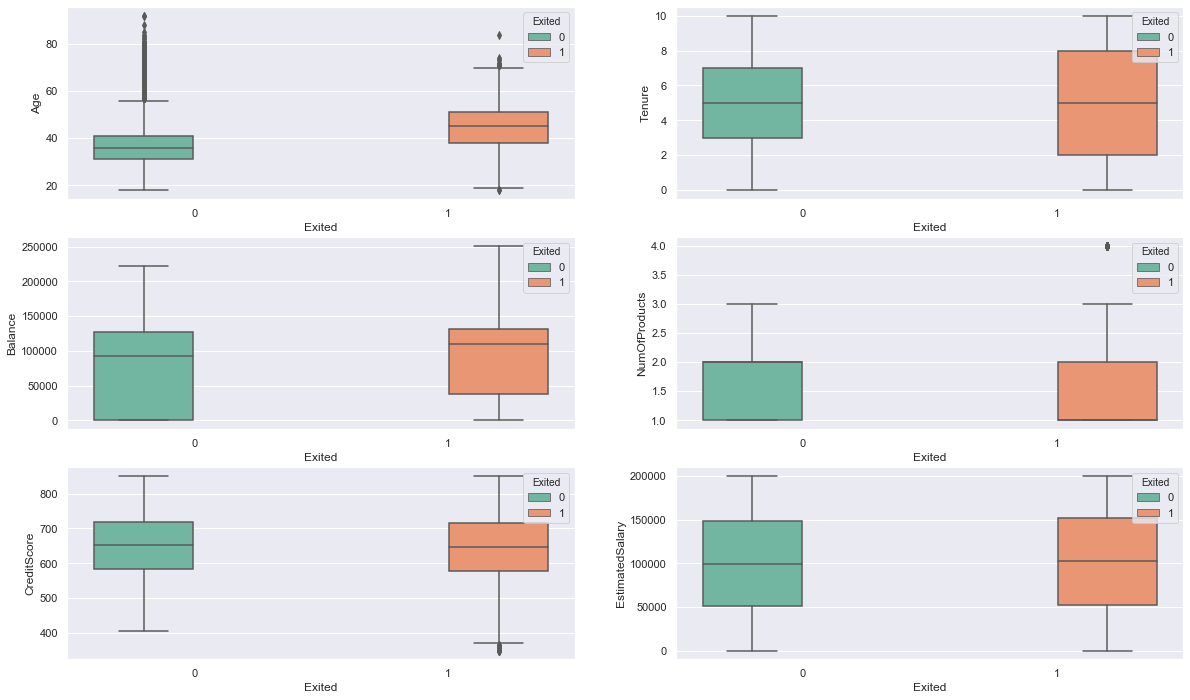

In [436]:
fig, axarr=plt.subplots(3,2, figsize=(20,12))

sns.boxplot(y='Age', x='Exited', hue='Exited', data=df, ax=axarr[0][0])
sns.boxplot(y='Tenure', x='Exited', hue='Exited', data=df, ax=axarr[0][1])
sns.boxplot(y='Balance', x='Exited', hue='Exited', data=df, ax=axarr[1][0])
sns.boxplot(y='NumOfProducts', x='Exited', hue='Exited', data=df, ax=axarr[1][1])
sns.boxplot(y='CreditScore', x='Exited', hue='Exited', data=df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary', x='Exited', hue='Exited', data=df, ax=axarr[2][1])


In [437]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1, inplace=True)

In [438]:
encoder=LabelEncoder()
df["Geography"]=encoder.fit_transform(df['Geography'])
df["Gender"]=encoder.fit_transform(df['Gender'])

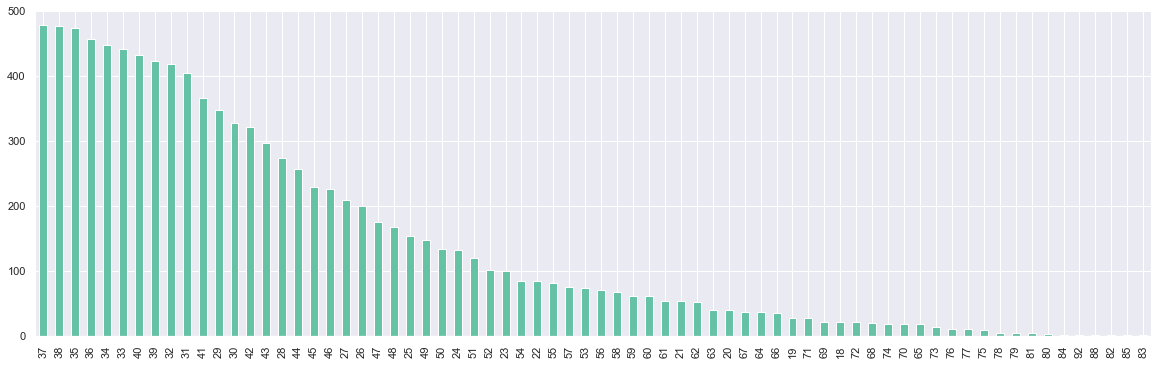

In [439]:
df['Age'].value_counts().plot.bar(figsize=(20,6))

### Checking correlation

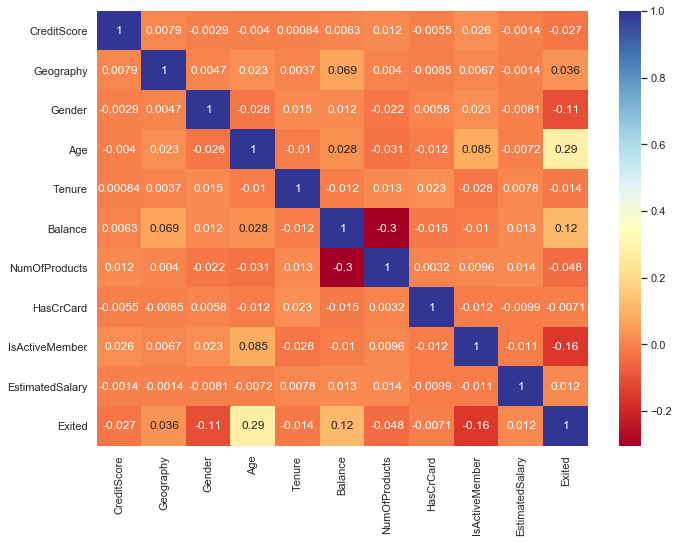

In [440]:
plt.subplots(figsize=(11,8))
sns.heatmap(df.corr(), annot=True, cmap="RdYlBu")
plt.show()

### Prediction with ML model

In [441]:
X=df.drop("Exited", axis=1)
y=df["Exited"]

In [442]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

### Gaussian 

In [443]:
clf=GaussianNB()
clf.fit(X_train, y_train)
pred= clf.predict(X_test)
accuracy_score(pred, y_test)

0.784

### Logistic regression

In [446]:
clf=LogisticRegression()
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
accuracy_score(pred, y_test)

0.789

### DecisionTree Classifier

In [449]:
clf=tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
accuracy_score(pred,y_test)

0.7855

### RandomForest Classifier

In [450]:
clf=RandomForestClassifier(n_estimators=200, random_state=200)
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
accuracy_score(pred,y_test)

0.864

### XGB Classifier

In [451]:
clf= XGBClassifier(max_depth= 10, random_state=10, n_estimators=220,
                  eval_metrics='auc', min_child_weight=3, colsample_bytree=0.75, subsample=0.9)

clf.fit(X_train, y_train)
pred=clf.predict(X_test)
accuracy_score(pred,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:10:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { eval_metrics } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:10:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.84

### MinMax Scaler

In [452]:
scaler= MinMaxScaler()

bumpy_features=["CreditScore","Age","Balance","EstimatedSalary"]
df_scaled=pd.DataFrame(data=X)
df_scaled[bumpy_features]=scaler.fit_transform(X[bumpy_features])

### Over Sampling

In [453]:
X= df_scaled
sm=SMOTE(random_state=42)
X_res, y_res= sm.fit_sample(X,y)
X_train,X_test,y_train,y_test= train_test_split(X_res, y_res,test_size=0.2, random_state=7)

In [454]:
clf = XGBClassifier(max_depth = 12,random_state=7, n_estimators=100, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.8)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 0.8885750156936597
Precision: 0.9012187299550994
Recall: 0.8748443337484434
F1: 0.8878357030015798
Area under precision (AUC) Recall: 0.8515146116102419


In [455]:
confusion_matrix(y_test, y_pred)

array([[1426,  154],
       [ 201, 1405]], dtype=int64)